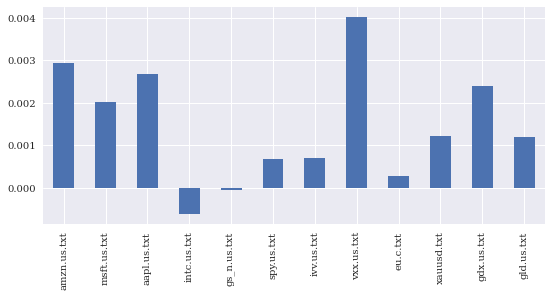

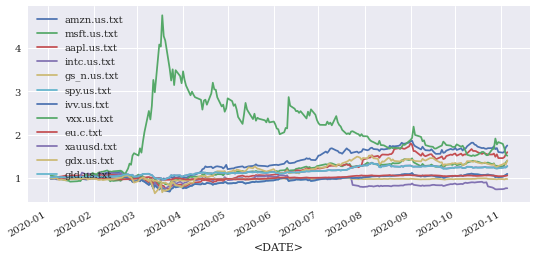

In [12]:
# Python 3
# Python for Finance, 2nd ed., Hilpisch, Ives
# Chapter 8 - Financial Time Series
# Figure 8-2 Mean values of percentage changes as bar plot
# Figure 8-3 Cumulative log returns over time
# https://stooq.com/db/h/
# https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

%matplotlib inline
import numpy as np
import pandas as pd
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

path0 = './data/daily/us/nasdaq stocks/1/amzn.us.txt'
path1 = './data/daily/us/nasdaq stocks/2/msft.us.txt'
path2 = './data/daily/us/nasdaq stocks/1/aapl.us.txt'
path3 = './data/daily/us/nasdaq stocks/1/intc.us.txt'
path4 = './data/daily/us/nyse stocks/1/gs_n.us.txt'
path5 = './data/daily/us/nyse etfs/spy.us.txt'
path6 = './data/daily/us/nyse etfs/ivv.us.txt' #etf simulates SPX index
path7 = './data/daily/us/nyse etfs/vxx.us.txt' #etf simulates VIX index
path8 = './data/daily/world/commodities cash/eu.c.txt'
path9 = './data/daily/world/currencies/major/xauusd.txt' #stand-in for XAU index
path10 = './data/daily/us/nyse etfs/gdx.us.txt'
path11 = './data/daily/us/nyse etfs/gld.us.txt'

filename = [path0, path1, path2, path3, path4, path5, path6, \
            path7, path8, path9, path10, path11]

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    data = pd.read_csv(filename[i], index_col=2, parse_dates=True)
    closePrice = data['<CLOSE>']
    closePriceYear = closePrice.loc['2020']
    
    symbol_long = filename[i].split('/')
    symbol = symbol_long[-1]
    
    closePriceYear.rename(symbol, inplace=True)
    
    if i==0:
        closePriceSymbolList = pd.DataFrame(data=closePriceYear)
    closePriceSymbolList.loc[:,symbol] = closePriceYear


# https://stackoverflow.com/questions/43283202/permission-denied-when-pandas-dataframe-to-tempfile-csv

# Percentage Returns
closePriceSymbolList.pct_change().mean().plot(kind='bar', figsize=(9,4))

# Log Returns
rets = np.log(closePriceSymbolList/closePriceSymbolList.shift(1))
rets.cumsum().apply(np.exp).plot(figsize=(9,4))
